# COST ANALYSIS BY CUSTOMER CHURN PREDICTION USING DIFFERENT MODELS

BY --<i>BHARAT SRI HARSHA KARPURAPU</i>

For commercial companies such as telecom companies and banking, customers are the main source of profit and protecting them is the most important part of any company. Here I developed a way for Cost Analysis by predicting customers in the churn class using different models. For POC purpose, I used one of the online available telecom datasets, and this model can be extended to any company.

In [1]:
# Importing Libraries
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cPickle
import time
import os
import plotly
import matplotlib as mpl
import plotly.plotly as py
import plotly.graph_objs as go
import seaborn as sns
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
sns.set_context("poster")
sns.set_style("whitegrid")

In [2]:
os.path #checking working directory

<module 'posixpath' from '/Users/kbsriharsha/anaconda2/lib/python2.7/posixpath.pyc'>

In [3]:
# Importing dataset
dflog=pd.read_csv("churn.csv")

# Exploratory Data Analysis

In [4]:
dflog.head(5)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [5]:
len(dflog)

3333

In [6]:
len(dflog.dropna()) #checking for null values

3333

In [7]:
dflog.shape #Matrix notation

(3333, 21)

For plotting purposes, we are using two interactive visualizations here, Plotly and tableau.

In [5]:
# setting plotly credentials ******* == kbsriharsha
plotly.tools.set_credentials_file(username='kbsriharsha', api_key='BmSCc8qJnHRg7Qp1SLqI')

<p> In the label values, </p>
<p><b> True. </b>indicates people who are in churn category</p>
<p><b> False.  </b>indicates people who are not in churn category</p>

In [6]:
%%html
<iframe width="900" height="800" frameborder="0" scrolling="no" src="//plot.ly/~kbsriharsha/13.embed"></iframe>

In [7]:
dflog.columns #Attributes

Index([u'State', u'Account Length', u'Area Code', u'Phone', u'Int'l Plan', u'VMail Plan', u'VMail Message', u'Day Mins', u'Day Calls', u'Day Charge', u'Eve Mins', u'Eve Calls', u'Eve Charge', u'Night Mins', u'Night Calls', u'Night Charge', u'Intl Mins', u'Intl Calls', u'Intl Charge', u'CustServ Calls', u'Churn?'], dtype='object')

In [8]:
dflog.dtypes #For data types of columns

State              object
Account Length      int64
Area Code           int64
Phone              object
Int'l Plan         object
VMail Plan         object
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
Churn?             object
dtype: object

In [9]:
# Changing yes or true to '1' and no or false to '0'
dflog['Int\'l Plan']=(dflog['Int\'l Plan'] == "yes")*1
dflog['VMail Plan']=(dflog['VMail Plan'] == "yes")*1
dflog['Churn?']=(dflog['Churn?'] == "True.")*1

In [10]:
dflog.dtypes #checking data types after cleaning

State              object
Account Length      int64
Area Code           int64
Phone              object
Int'l Plan          int64
VMail Plan          int64
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
Churn?              int64
dtype: object

In [11]:
dflog.describe() # For descriptive Statistics 

,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [12]:
# Finding the number of unique states
len(dflog.State.unique())

51

The below graph shows the data distribution per state. <b>green</b> bars indicates people who dont belong to churn category. i.e. safe category. While <b>orange</b> indicates people who belong to churn category i.e. alarming category.

In [2]:
%%html
<div class='tableauPlaceholder' id='viz1484692003935' style='position: relative'><noscript><a href='#'><img alt='Sheet 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Re&#47;RecordDistribution&#47;Sheet1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='site_root' value='' /><param name='name' value='RecordDistribution&#47;Sheet1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Re&#47;RecordDistribution&#47;Sheet1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1484692003935');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Let's see box-plot visualization of average amount payable by every customer from a particular state. Here the total cost paid by the customer is obtained by summing up their day charge, evening charge, night charge, international charge.

In [17]:
%%html
<iframe width="900" height="800" frameborder="0" scrolling="no" src="//plot.ly/~kbsriharsha/12.embed"></iframe>

<p>Delving more into dataset </p>
<p>Color coding for below visualisations</p>
<p><b> 1 = True = orange </b> People who will churn.</p>
<p><b> 0 = False = green </b> People who wont churn.</p>

All the below visualizations are interactive ones, just hover the pointer to see the finding.

In [1]:
%%html
<div class='tableauPlaceholder' id='viz1484692072023' style='position: relative'><noscript><a href='#'><img alt='Sheet 4 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Co&#47;CostDistribution&#47;Sheet4&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='site_root' value='' /><param name='name' value='CostDistribution&#47;Sheet4' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Co&#47;CostDistribution&#47;Sheet4&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1484692072023');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [2]:
%%html
<div class='tableauPlaceholder' id='viz1484692128253' style='position: relative'><noscript><a href='#'><img alt='Sheet 3 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;An&#47;Analysis_79&#47;Sheet3&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='site_root' value='' /><param name='name' value='Analysis_79&#47;Sheet3' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;An&#47;Analysis_79&#47;Sheet3&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1484692128253');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

<h4> DashBoard </h4>

In [3]:
%%html
<div class='tableauPlaceholder' id='viz1484692230346' style='position: relative'><noscript><a href='#'><img alt='Dashboard 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Fi&#47;FinalChurnDistributionDashboard&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='site_root' value='' /><param name='name' value='FinalChurnDistributionDashboard&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Fi&#47;FinalChurnDistributionDashboard&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1484692230346');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

<h4> Important Findings </h4>

<p>Well, the great value to a picture is, when it forces us to observe something what we never expected. Through these visualisations, we can draw many inferences. However I am mentioning some important findings.</p>
<p>Here the safest state for the company is West Virgenia with the ratio of notchurn to the churn class being 9.7 and the most alarming state is California with the ratio being 2.7</p>
<p>In most states, the people who are in churn class are the people who are paying more to the company</p>
<p>In the same trend, the people who are in churn class are talking more no.of minutes in the phone than the people who are in safe class. Though peak value of the no.of calls made by customers seems to varying between churn and not churn classes, the overall duration of time spent by churn class people is more.</p>
<p>My overall, conclusion is that people who are in churn class are people who are making more profits to the comany, if the company gonna loose them, then the company will suffer huge loss, than expected</p>
<p>We can made many more inferences from these visualisations, like perstate variation etc.,</p>

With this Exploratory data analysis part completed.


# MODELLING OF DATA 

<p>Here, we are modelling the data about the business end i.e. keeping the costs down. So all the below things will proceed for achieving that scenario.</p>
<p>Before modelling, we need to perform some data operations</p>

In [14]:
# Seperating the feature columns by removing unwanted columns and the label
drop = ['State','Area Code','Phone']
Final_columns = dflog.drop(drop,axis=1)

In [15]:
# Getting Feature Columns
Final_columns_attributes = Final_columns.drop(['Churn?'], axis=1)
Final_columns_attributes

,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
5,118,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
6,121,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3
7,147,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0
8,117,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1
9,141,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0


In [16]:
len(Final_columns_attributes.columns) #no.of attributes

17

In [17]:
Feature_names = Final_columns_attributes.columns # Getting feature names
Feature_names

Index([u'Account Length', u'Int'l Plan', u'VMail Plan', u'VMail Message', u'Day Mins', u'Day Calls', u'Day Charge', u'Eve Mins', u'Eve Calls', u'Eve Charge', u'Night Mins', u'Night Calls', u'Night Charge', u'Intl Mins', u'Intl Calls', u'Intl Charge', u'CustServ Calls'], dtype='object')

In [18]:
Label_Churn = Final_columns['Churn?'] 

In [19]:
Label_Churn.mean()*100 #Checking for asymmetricity

14.491449144914492

In [20]:
Label_names = Final_columns.columns[-1]
Label_names

'Churn?'

In [21]:
# Training and Testing sets
churn_train,churn_test = train_test_split(Final_columns, train_size=0.6)

In [22]:
# Building a general classifier which will work for all conditions
def classifier(clf, parameters, input_data_training, input_data_testing, feature_names, label_name, n_folds=5, n_jobs=1, sco_func = "none"):
    feature_df_training = input_data_training[feature_names]
    X_train = feature_df_training.values
    Label_column_training = input_data_training[label_name]
    Y_train = Label_column_training.values
    feature_df_testing = input_data_testing[feature_names]
    X_test = feature_df_testing.values
    Label_column_testing = input_data_testing[label_name]
    Y_test = Label_column_testing.values
    if parameters:
        if sco_func == "none":
            gs = GridSearchCV(clf, param_grid = parameters, cv = n_folds, n_jobs = n_jobs)
        else:
            gs = GridSearchCV(clf, param_grid = parameters, cv = n_folds, n_jobs = n_jobs, scoring = sco_func)
        gs.fit(X_train,Y_train)
        print "Best_GridSearch_fit:" , gs.best_params_, gs.best_score_, gs.grid_scores_
        print "Best_Estimator:" , gs.best_estimator_
        clf = gs.best_estimator_.fit(X_train,Y_train)
    clf.fit(X_train,Y_train)
    training_accuracy = clf.score(X_train,Y_train)
    testing_accuracy = clf.score(X_test,Y_test)
    print "........Standard_Prediction_Report........"
    print "Training_Accuracy = %0.2f" % (training_accuracy)
    print "Testing_Accuracy = %0.2f" % (testing_accuracy)
    print confusion_matrix(Y_test, clf.predict(X_test))
    print ".........................................."
    return clf

<h4><b> Considerations </b></h4>
<p> Here we can observe that the given data set is very imbalanced(asymmetric) one with only 14.49% of them being positive examples and 85.51% of them being negative examples. Here any basic classifier will give will give an accuracy score of more than 85%. So we can say that accuracy_score is not a good measure of best classifier or best model.
<p> Here we should be more concentrated on the false negatives rather than the false positives (just think in the case of cancer patient). Because false positives may result in the loss of offer cost whee false negative will result in the loss of life time value of the customer.
<p> Our ultimate aim is to get profit to the company. So we should build a classifier keeping the which will result in low cost or to maximize the profit for the company. For this condition we should take into account of all the 4 scenarios of the confusion matrix.
<li><ul> True Negatives (TN) </ul>
    <ul> True Positives (TP) </ul>
    <ul> False Positives (FP) </ul>
    <ul> False Negatives (FN) </ul></li></p>
<p> As we are more worried about false positives than false negatives and our aim is to maximize the profit to the company, So we are constructing a cost matrix which will consider all the four scenarios in the confusion matrix.
<li> <ul>True Negative Cost (TNC): We don't need to spend any amount on the True negative numbers as they are going to continue as our customers anyway.</ul>
<ul>True Positive Cost (TPC) : We need to spend some money for these people (like giving offers, free calls, etc.) just to stop them to leave the company.</ul>
<ul>False Positive Cost (FPC) : False Postive numbers are which we predicted as churn but actually they won't but as the model predicted True, assume we will spend some money on these people.</ul>
<ul>False Negative Cost (FNC) : False Negative numbers ae which we predicted as won't churn and they will churn. So in this we may lost in the life-time value of the customer.</ul></li></p>
<p> Now by above considerations, lets assume some arbitrary cost to those
<li> 
<ul>TNC = 0 (As we don't need to spend anything)</ul>
<ul>FPC = 80 dollars (Consider to be offer cost to keep them with company)</ul>
<ul>FNC = 1500 dollars (Assuming to be the life time value of the customer) </ul>
<ul> TPC = f(FPC) + (1-f)(FNC), i.e; for True postives, we can't assume every one to accept the offer cost. So for the people who accept the offer cost, we will result in spend the offer value and for the people who don't, we result in losing the life time value of the customer. So by assuming the fraction who accepted the offer as 0.5, we can calculate the TPC = (0.5)(80) + (0.5)(1500) = 830$. So on an average we spend/lost an amount of 850 dollars for every True postive.</ul></li>
<p> Let's construct the cost matrix </p>

In [30]:
# Cost matrix
TNC = 0
TPC = 830
FNC = 1500
FPC = 80
cost_matrix=np.array([[TNC, FPC],[FNC, TPC]])
print np.array([['TNC', 'FPC'],['FNC', 'TPC']]),"\n"
print cost_matrix


[['TNC' 'FPC']
 ['FNC' 'TPC']] 

[[   0   80]
 [1500  830]]


Now we can can calculate average profit by estimating the average cost spent on every customer which is given by
 

\begin{eqnarray}
AverageCost &=& \frac{(TP \times TPC) + (FP \times FPC) + (FN \times FNC) + (TN \times TNC)}{TP+FP+FN+TN}
\end{eqnarray}



<b>Now we can understand that the best classifier is one which reduces this average cost per customer and maximimes the profit for the company</b>

In [31]:
# Function of generating average cost
def Average_Cost(Y, Y_Pre, cost=cost_matrix):
    confuse_matrix = confusion_matrix(Y,Y_Pre)
    average_cost = np.sum(confuse_matrix*cost)/np.sum(confuse_matrix)
    return average_cost

When ever, you are comparing classifiers, we should consider the extreme baseline classifier.
Let consider the extreme cases of our predictor. i.e. predicting everyone will as churn(1) and everyone as won't churb(0).

In [32]:
# Predicting everything as positive
Y_Prediction = np.ones(churn_test.shape[0])
confusion_matrix(churn_test["Churn?"],Y_Prediction)

array([[   0, 1149],
       [   0,  185]])

In [33]:
cost = Average_Cost(churn_test["Churn?"],Y_Prediction)
cost

184

In [34]:
# Predicting everything as negative
Y_Prediction = np.zeros(churn_test.shape[0])
confusion_matrix(churn_test["Churn?"],Y_Prediction)

array([[1149,    0],
       [ 185,    0]])

In [35]:
cost = Average_Cost(churn_test["Churn?"],Y_Prediction)
cost

208

So if our classifier predicted as everything negative, we will thought everyone will stay with us and we result in a loss of 208$ per every customer. Now our ultimate aim is to build a model which will decrease this cost.

In [36]:
from sklearn.ensemble import RandomForestClassifier
clf_Forest = RandomForestClassifier()
parameters = {"n_estimators": range(1, 25)}
clf_Forest = classifier(clf_Forest, parameters, churn_train, churn_test, Feature_names, Label_names)

Best_GridSearch_fit: {'n_estimators': 21} 0.947473736868 [mean: 0.88044, std: 0.01901, params: {'n_estimators': 1}, mean: 0.90845, std: 0.01063, params: {'n_estimators': 2}, mean: 0.91296, std: 0.01146, params: {'n_estimators': 3}, mean: 0.91796, std: 0.00520, params: {'n_estimators': 4}, mean: 0.93497, std: 0.00814, params: {'n_estimators': 5}, mean: 0.93097, std: 0.00750, params: {'n_estimators': 6}, mean: 0.93397, std: 0.00661, params: {'n_estimators': 7}, mean: 0.93447, std: 0.00670, params: {'n_estimators': 8}, mean: 0.94097, std: 0.00520, params: {'n_estimators': 9}, mean: 0.93947, std: 0.00879, params: {'n_estimators': 10}, mean: 0.94197, std: 0.00486, params: {'n_estimators': 11}, mean: 0.93647, std: 0.00442, params: {'n_estimators': 12}, mean: 0.94497, std: 0.00690, params: {'n_estimators': 13}, mean: 0.93797, std: 0.00374, params: {'n_estimators': 14}, mean: 0.94047, std: 0.01472, params: {'n_estimators': 15}, mean: 0.94397, std: 0.01270, params: {'n_estimators': 16}, mean: 0

In [37]:
Y_Prediction = clf_Forest.predict(churn_test[Feature_names].values)

In [38]:
cost = Average_Cost(churn_test["Churn?"], Y_Prediction)
cost

141

Generally, most classifier's predict the class as postive or negative depending on the threshold value of propability with some decision loss(except for SVM which is a discriminative classifier). As we discussed earlier, false negatives will cost us more money than false postives. So we have to predict a member as positive, even for a small likelihood for postivity. Now change the threshold probability to some lesser value and see how much we can save(General threhold is 0.5). So let's start repredicting the class variables.

In [39]:
# For repredicting class with some different threshold value
def re_predict(estimator, t_hold, X_test):
    prob = estimator.predict_proba(churn_test[Feature_names].values)[:,1]
    y_pred = ((prob >= t_hold)*1)
    return y_pred

In [40]:
Y_Prediction = re_predict(clf_Forest, 0.3, churn_test[Feature_names])

In [41]:
cost = Average_Cost(churn_test["Churn?"], Y_Prediction)
cost

134

So we can see that at a threshold of 0.3, it is offering low cost.

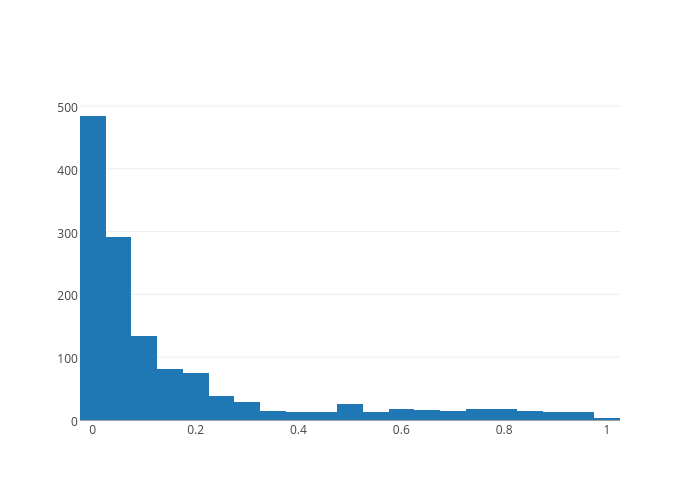

In [42]:
# class probabilites distribution histgram
data = [
    go.Histogram(
        x=clf_Forest.predict_proba(churn_test[Feature_names])[:,1]
    )
]
py.iplot(data)

In [43]:
# For ROC curve with thresholding labels
from sklearn.metrics import roc_curve, auc
def roc_make(ax,name,clf,xtest,ytest,interval):
    if ax == None:
        ax = plt.gca()
    fpr,tpr,thresholds = roc_curve(ytest, clf.predict_proba(xtest)[:,1])
    roc_auc = auc(fpr,tpr)
    ax.plot(fpr,tpr, '.-', alpha = 0.9, label = 'ROC curve for %s(area = %0.2f)'%(name,roc_auc))
    for k in xrange(0,fpr.shape[0],interval):
        thres_hold = str(np.round(thresholds[k],2))
        ax.annotate(thres_hold, (fpr[k], tpr[k]), **{'bbox': {'alpha': 0.2, 'boxstyle': 'round,pad=0.1'}})
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_title('ROC')
    ax.legend(loc="lower right")
    return ax   

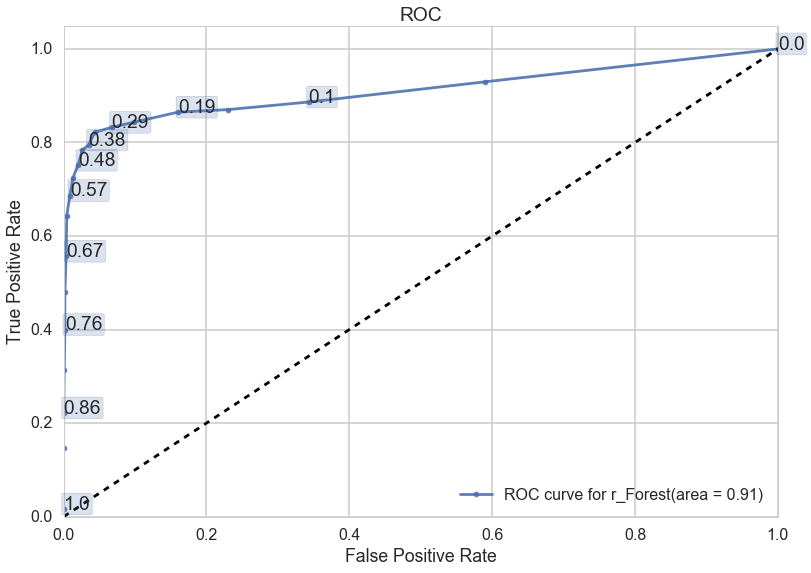

In [44]:
roc_make(None,"r_Forest", clf_Forest, churn_test[Feature_names], churn_test['Churn?'], 2)

Now that we potted the roc curve for random forest classifier with threshold values. Before deciding which threshold to choose, lets calculate the effect of different attributes on this classifier and try other classifiers too for answering different business questions.

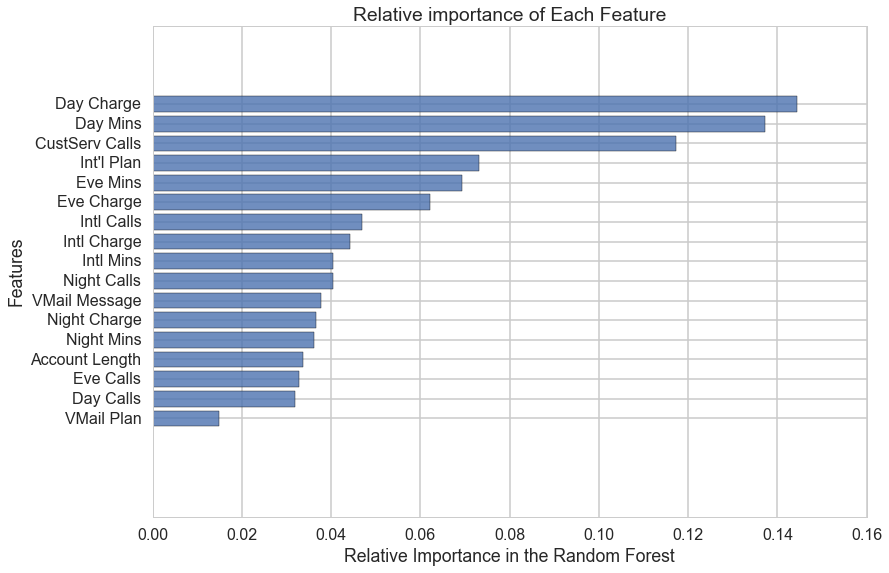

In [45]:
# Relative importance of features
importance_list = clf_Forest.feature_importances_
name_list = churn_test.columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
plt.barh(range(len(name_list)),importance_list,align='center', alpha = 0.8)
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.show()

In [46]:
# Let's try another ense,ble classifier Adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
clf_abc = AdaBoostClassifier()
parameters = {"n_estimators": range(7,15)}
clf_abc = classifier(clf_abc, parameters, churn_train, churn_test, Feature_names, Label_names)

Best_GridSearch_fit: {'n_estimators': 8} 0.873936968484 [mean: 0.86893, std: 0.01303, params: {'n_estimators': 7}, mean: 0.87394, std: 0.01469, params: {'n_estimators': 8}, mean: 0.87094, std: 0.01239, params: {'n_estimators': 9}, mean: 0.87144, std: 0.00853, params: {'n_estimators': 10}, mean: 0.87194, std: 0.00914, params: {'n_estimators': 11}, mean: 0.87294, std: 0.00745, params: {'n_estimators': 12}, mean: 0.86943, std: 0.01117, params: {'n_estimators': 13}, mean: 0.87344, std: 0.01080, params: {'n_estimators': 14}]
Best_Estimator: AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=8, random_state=None)
........Standard_Prediction_Report........
Training_Accuracy = 0.88
Testing_Accuracy = 0.87
[[1085   64]
 [ 112   73]]
..........................................


In [47]:
Y_Prediction = clf_abc.predict(churn_test[Feature_names].values)

In [48]:
cost = Average_Cost(churn_test["Churn?"], Y_Prediction)
cost

175

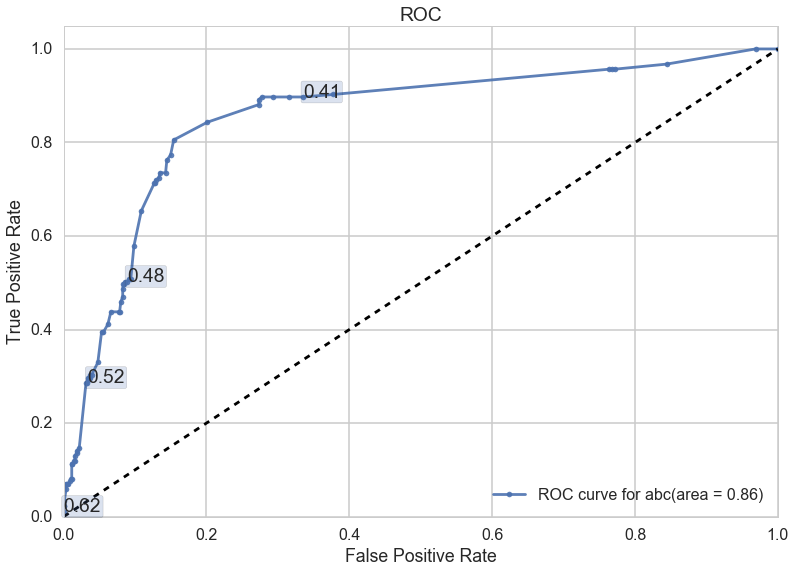

In [49]:
roc_make(None,"abc", clf_abc, churn_test[Feature_names], churn_test['Churn?'], 20)

In [50]:
# Trying with Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
clf_gnb = GaussianNB()
clf_gnb = classifier(clf_gnb, None, churn_train, churn_test, Feature_names, Label_names)

........Standard_Prediction_Report........
Training_Accuracy = 0.87
Testing_Accuracy = 0.86
[[1047  102]
 [  85  100]]
..........................................


In [51]:
Y_Prediction = clf_gnb.predict(churn_test[Feature_names].values)

In [52]:
cost = Average_Cost(churn_test["Churn?"], Y_Prediction)
cost

163

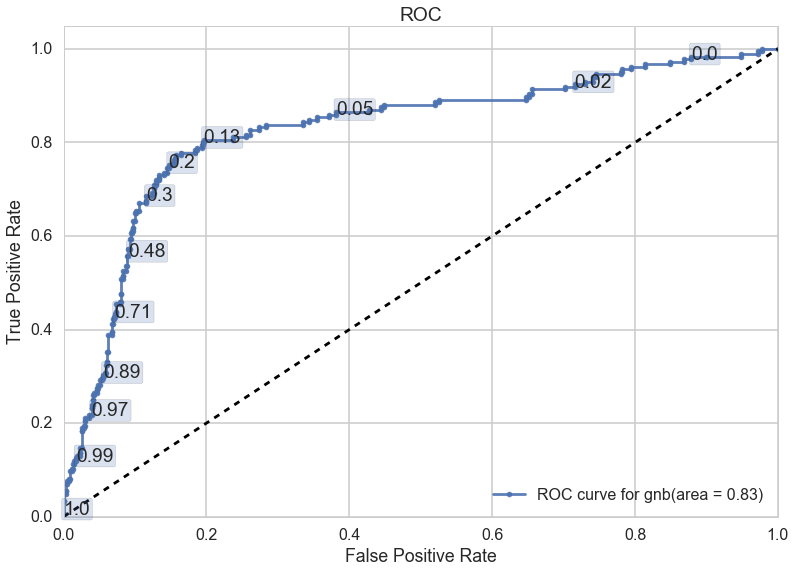

In [53]:
roc_make(None,"gnb", clf_gnb, churn_test[Feature_names], churn_test['Churn?'], 20)

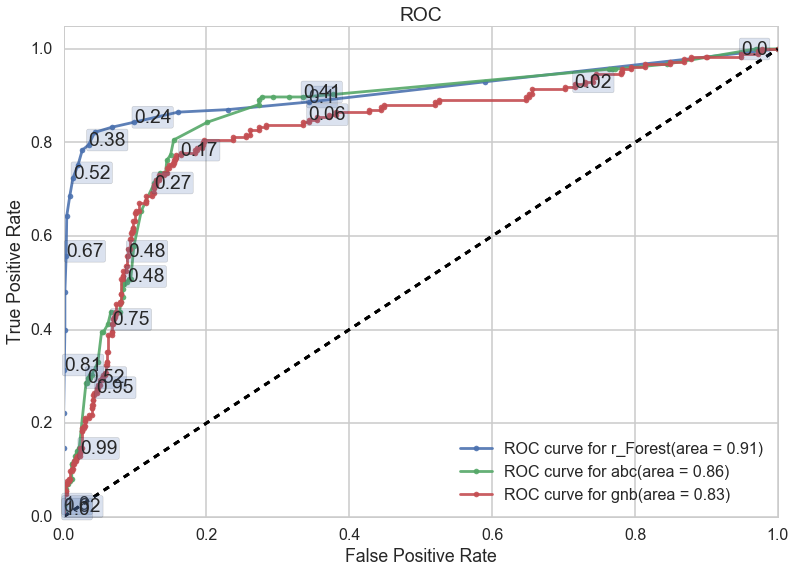

In [54]:
ax = roc_make(None,"r_Forest", clf_Forest, churn_test[Feature_names], churn_test['Churn?'], 3)
ax1 = roc_make(ax,"abc", clf_abc, churn_test[Feature_names], churn_test['Churn?'], 20)
roc_make(ax1,"gnb", clf_gnb, churn_test[Feature_names], churn_test['Churn?'], 25)

We can abserve that in almost all cases, random forest perform well, but at very lower threshold values adaboost performs well.


For finding the optimum thresholds, we should get into some decision theory(branch of statistics which deals with predicting the positive or negative class for a given sample. Here in the probability classification, decision is nothing but choosing the class of a sample, given the probability of being in that class. Here in this scenario, by minimizing the estimation risk we will get a class probability of being churn and by mixing that with the domain knowledge, we can make a decision.

 <h4>Formula for finding the optimum threshold with decision theory notion</h4>
<p>Generally we consider a class variable if the risk involved in choosing that class variable is less than the risk involved in choosing the other class variables.</p>
<p>The risk involved in choosing a class variable g is given by 
$$ R_{g}(x) = \sum_y l(y,g(x)) p(y|x)$$

where l(y,g(x)) represents the combinational loss for that combination and p(y|x) represents the probability of occurance of that combination. 
<p>Lets consider a two sample classification case i.e being one or being zero and lets say we make a decision g about which class for a sample x, then the risk is given by
$$R_g(x) = l(1, g)p(1|x) + l(0, g)p(0|x).$$

Then risk involved in choosing the class as 1 is 
$$R_1(x) = l(1,1)p(1|x) + l(0,1)p(0|x),$$

Then the risk involved in choosing the class as 0 is
$$R_0(x) = l(1,1)p(1|x) + l(0,1)p(0|x),$$

Now we will classify the class as 1, if 
$$R_1(x) < R_0(x),$$ 

$$l(1,1)p(1|x) + l(0,1)p(0|x) < l(1,1)p(1|x) + l(0,1)p(0|x)$$

$$ P(1|x)(l(1,1) - l(1,0)) \lt p(0|x)(l(0,0) - l(0,1))$$

Now finally we will choose 1, if 

$$p(1|x) > rP(0|x) $$

where 
$$r = \frac{l(0,1) - l(0,0)}{l(1,0) - l(1,1)} =\frac{CFP - CTN}{CFN - CTP}$$

or we can write the above condition as

$$p(1|x) > t $$ where $$t = \frac{r}{1+r}$$

Imagine a case, where our dont have to assign any cost for true positives or true negatives and the cost of false postives is equal to false negatives. In this case our threshold is equals to 0.5 (normal scenario)

So below, we have to choose a threshold value, which will minimize our average cost given the cost matrix.

In [55]:
def ratio(cost):
    return float(cost[0,1] - cost[0,0])/float(cost[1,0] - cost[1,1])

In [56]:
def cost_repred(clf,cos,x_test):
    r = ratio(cos)
    print "r:", r
    t = r/1.+r
    print "t:", t
    probs = clf.predict_proba(x_test)
    t_s = probs[:,1]
    ypred = (t_s >= t)*1
    return ypred

In [57]:
cost_repred(clf_Forest,cost_matrix,churn_test[Feature_names].values)

r: 0.119402985075
t: 0.238805970149


array([0, 0, 0, ..., 0, 0, 0])

In [58]:
Average_Cost(churn_test['Churn?'],cost_repred(clf_Forest,cost_matrix,churn_test[Feature_names].values))

r: 0.119402985075
t: 0.238805970149


135

In [59]:
# threshold ranges for plotting 
t_holds = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

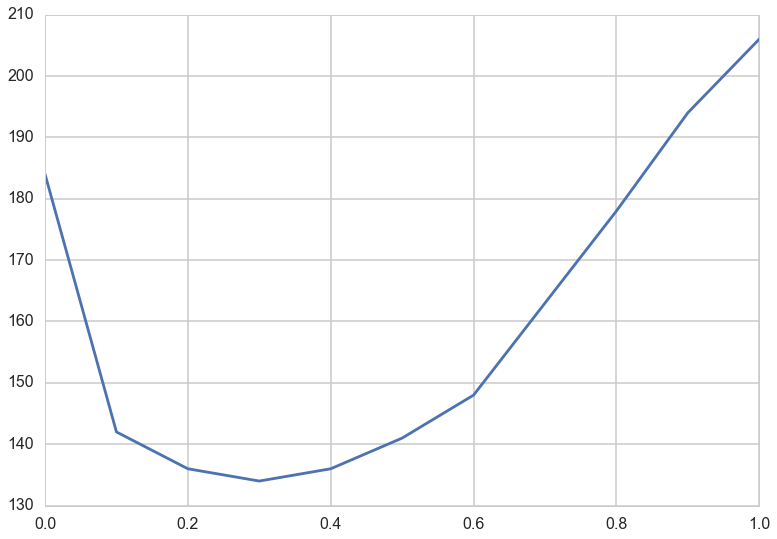

In [60]:
# Cost curves as a function of thresholds
plt.plot(t_holds, [Average_Cost(churn_test['Churn?'],re_predict(clf_Forest, t ,churn_test[Feature_names].values)) for t in t_holds])

So from the above curve, we can say that the optimum threshold value for saving more money to the company is from 0.3.

<h4> Cost Curves from business side </h4>

Till now, we choose the best classifier depending upon the threshold and ROC curve. Initially, we got the threshold from the cost matrix, and observed the ROC curve and calculated the average amount to pick the best appropriate method. However, when it comes to business point of view, there involves many scenarios like bugdet, production cost variation etc. Because for different budgets, we can only concentrate on some specific proportions of population like only 20%, 30% etc. Let's take a look into the cost curves to choose which model to choose at different business scenarios.

In [61]:
def cost_plot(name, clf, ytest, xtest, cost, interval, ax=None):
    if not ax:
        ax=plt.gca()
    fpr, tpr, thresholds=roc_curve(ytest, clf.predict_proba(xtest)[:,1])
    prior_p=np.mean(ytest)
    prior_n=1. - prior_p
    value=[]
    percen=[]
    for i,t in enumerate(thresholds):
        perc=tpr[i]*prior_p + fpr[i]*prior_n
        e_v = prior_p*(cost[1][1]*tpr[i]+cost[1][0]*(1.-tpr[i]))+prior_n*(cost[0][0]*(1.-fpr[i]) +cost[0][1]*fpr[i])
        value.append(e_v)
        percen.append(perc*100)
    ax.plot(percen, value, '-', alpha=0.7, markersize=5, label='cost curve for %s' % name)
    for k in xrange(0, fpr.shape[0],interval):
        threshold = str(np.round(thresholds[k], 2))
        ax.annotate(threshold, (percen[k], value[k]), **{'bbox': {'alpha': 0.2, 'boxstyle': 'round,pad=0.1'}})
    ax.set_xlabel('Percentage')
    ax.set_ylabel('Average Cost')
    ax.set_title('Cost Curves')
    ax.legend(loc="lower right")
    return ax

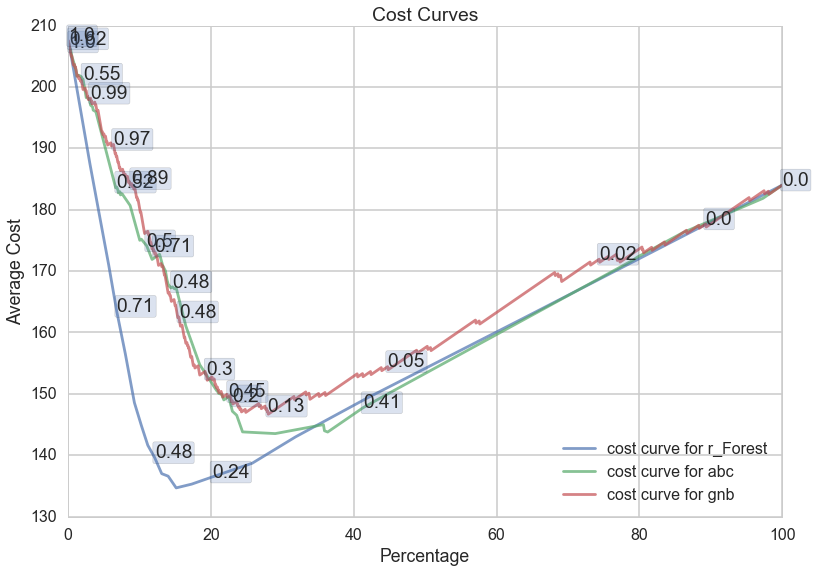

In [62]:
ax = cost_plot("r_Forest",clf_Forest, churn_test['Churn?'], churn_test[Feature_names], cost_matrix, 5)
ax1 = cost_plot("abc",clf_abc, churn_test['Churn?'], churn_test[Feature_names], cost_matrix, 10, ax)
cost_plot("gnb",clf_gnb, churn_test['Churn?'], churn_test[Feature_names], cost_matrix, 20, ax1)

We can observe that at every stage Random Forests cost curve shows better performance than adaboost and gaussian classifier but at higher percentages adaboost classifier shows slightly better percentages than random forest. So in the final model we can neglect the gaussian naive bayes model.

<p>Haha!!! Both ensemble methods takes its lead over pure propabilistic model </p>

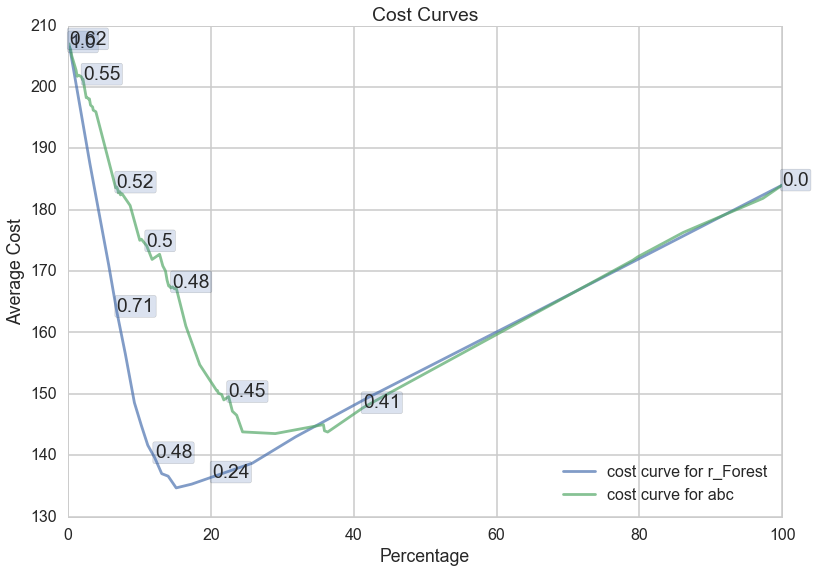

In [63]:
ax = cost_plot("r_Forest",clf_Forest, churn_test['Churn?'], churn_test[Feature_names], cost_matrix, 5)
cost_plot("abc",clf_abc, churn_test['Churn?'], churn_test[Feature_names], cost_matrix, 10, ax)

<h4>How to select a model</h4>

<p> Using above curves, companies can select a model depending on their budget. Let's take a company want to concentrate on 20% of population due to budget limitations, then they should consider a random classifier model. If the company has more budget and want to concentrate on 40% population, then they should choose adaboost classifier model due to its lower cost at that point. So selecting a model depends on various business questions.</p>


<h4> Profit Calculation </h4>

For Profit calculation, Let's go with choosing the best classifier with the best threshold at which the classifier offers lower cost. In this case, best classifier is Random Forests and best threshold is 0.233. I am considering a arbitrary value of 1M customers to give profit in values.

<p>Let's go step by step and calculate the profit at every scenario</p>

<p>Let's say that the company model predicted worsely and failed to predict any churn customer. If model predicted everyone as not churn, then company will suffer a loss of 220 dollars on every customer.

<p>There fore total cost (includes only life time loss) = 1000000 * 208 = 208000000 dollars.</p>

<p> Now company adopts the best classifier like random forest classifier. In this scenario, company able to predict some customers as churn and unable to predict some. So it will give some offers to customers who are in churn, some customers will accept the offer and stay with us and some won't. So company is going to loose offer cost on customers who accept the offer and life time value on customers, who won't. The average cost here is 141 dollars.

<p>There fore total cost= 1000000 * 141 = 141000000 dollars </p>

<p>Profit generated in this case = 208000000 - 141000000 = 67000000 dollars</p>

<p>Profit Percentage $$ = \frac{208-141}{208}*100 = 30.4% $$

<p>So company can generate a profit of 30.4% with this model</p>

<p> Now let's say that company adopt the best classifier with the best threshold and able to predict more customers on churn side. In this case the average cost per customer decreased more further to 135 dollars<p>

<p>Total cost = 10000000 * 135 = 135000000 dollars</p>

<p>Profit generated in this case = 208000000 - 135000000 = 73000000 dollars</p>

<p>Profit Percentage $$ = \frac{208-135}{208}*100 = 35.1% $$

<p>So company can generate a profit of 35.1% in this scenario</p>

<p>So the final model able to generate a profit of 73M dollars which accounts for almost 35% profit to the company</p>


# Skill Sets Used:

<p><b>Topics</b>: Descriptive Statistics, Inferrential Statistics, Machine Learning, Decision Theory, Predictive Analytics</p>
<p><b>Machine Learning Algorithms</b>: Ensemble Methods(Random Forests, Adaboost Classifier), Gaussian Naive Bayes Classifier</p>
<p><b>Robustness</b>: Bootstrapping(Random Forests inbuilt), Adaptive thresholding
<p><b>Compute</b>: python </p>
<p><b>Data Tools</b>: Jupyter notebook, Spyder</p>
<p><b>Data Visualization</b>: Plotly, Tableau, matplotlib</p>
<p><b>Version Controls</b>: Git</p>
